### Author: Michał Kotarba
The dataset contains phrases and their sentiment. In the competition on kaggle.com the best accuracy was around 75%  when predicting sentiment of test dataset, meaning it's not an easy task. It may be hard for a computer to distinguish what is an irony and when the author is speaking honestly.

In [18]:
import numpy as np
import pandas as pd
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)

In [19]:
df_train = pd.read_csv('train.tsv',delimiter='\t')
df_test = pd.read_csv('test.tsv',delimiter='\t')
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [20]:
x_train = np.array(list(df_train['Phrase']))
y_train = np.array(list(df_train['Sentiment']))

x_test = np.array(list(df_test['Phrase']))
y_test = np.array(list(df_train['Sentiment']))
test_phrase_ids= np.array(list(df_test['PhraseId']))

In [21]:
tokenizer = Tokenizer(num_words=2000)

tokenizer.fit_on_texts(x_train)
Tokenizer_vocab_size = len(tokenizer.word_index) + 1

In [22]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, 5)

In [23]:
num_classes=5
model = Sequential()
model.add(Dense(256, activation='elu', input_dim=2000))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=16,
          epochs=5, 
          verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               512256    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
Total params: 513,541
Trainable params: 513,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
156060/156060 [==============================] - 53s 338us/step - loss: 1.0773 - acc: 0.5809
Epoch 2/5
156060/156060 [==============================] - 51s 329us/step - loss: 1.0209 - acc: 0.6034
Epoch 3/5
156060/156060 [==============================] - 49s 316us/step - loss: 1.0108 - acc: 0.6075
Epoch 4/5
156060/156060 [==============================] - 50s 321us/step - loss: 1.0044 - 

Quick visualization of model training history


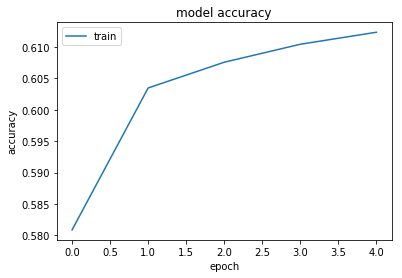

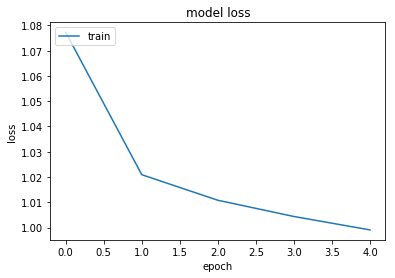

In [24]:
print('Quick visualization of model training history')
plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [25]:
predictions = model.predict_classes(x_test)

In [26]:
np.savetxt("predictions.csv", predictions, delimiter=",")